In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import IntSlider, interact
from pulp import LpMaximize, LpProblem, LpStatus, LpVariable, value

%matplotlib inline

interactive(children=(IntSlider(value=100, description='Mars Revenue Per KG', max=400, min=1, style=SliderStyl…

<function __main__.bar_production(mars_price_per_kg: int = 100, snickers_price_per_kg: int = 105, cocoa_price_per_kg: int = 20, caramel_price_per_kg: int = 15, oil_price_per_kg: int = 7, sugar_price_per_kg: int = 20, nuts_price_per_kg: int = 50, max_packages: int = 10000, max_nuts: int = 3000, max_cocoa: int = 6000, bar_proportions: int = 50, printable=True)>

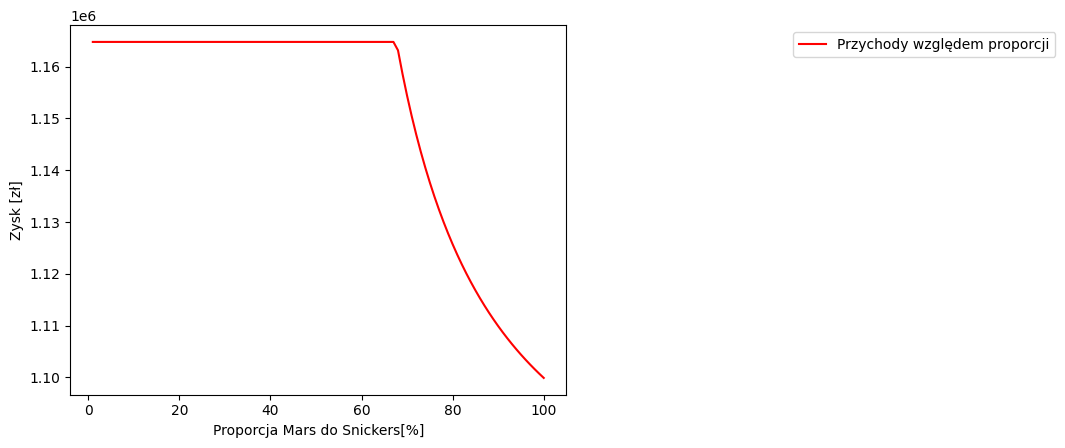

In [ ]:
MARS: dict[str, float] = {"Cocoa": 0.5, "Caramel": 0.2, "Nuts": 0, "Oil": 0.05, "Sugar": 0.3}

SNICKERS: dict[str, float] = {"Cocoa": 0.4, "Caramel": 0.2, "Nuts": 0.2, "Oil": 0.05, "Sugar": 0.3}

slider_style = {"description_width": "initial"}

mars_price_slider = IntSlider(min=1, max=400, value=100, description="Mars Revenue Per KG", style=slider_style)
snickers_price_slider = IntSlider(min=1, max=400, value=105, description="Snickers Revenue Per KG", style=slider_style)
cocoa_price_slider = IntSlider(min=1, max=100, value=20, description="Cocoa Cost Per KG", style=slider_style)
caramel_price_slider = IntSlider(min=1, max=100, value=15, description="Caramel Cost Per KG", style=slider_style)
oil_price_slider = IntSlider(min=1, max=100, value=7, description="Oil Cost Per KG", style=slider_style)
sugar_price_slider = IntSlider(min=1, max=100, value=20, description="Sugar Cost Per KG", style=slider_style)
nuts_price_slider = IntSlider(min=1, max=100, value=50, description="Nuts Cost Per KG", style=slider_style)
max_packages_slider = IntSlider(min=1, max=20000, value=10000, description="Max Packages Amount", style=slider_style)
max_nuts_slider = IntSlider(min=1, max=20000, value=3000, description="Max Nuts Amount", style=slider_style)
max_cocoa_slider = IntSlider(min=1, max=20000, value=6000, description="Max Cocoa Amount", style=slider_style)
bar_proportion_slider = IntSlider(min=0, max=100, value=50, description="Bar Proportions %", style=slider_style)

y = []


def bar_production(
    mars_price_per_kg: int = 100,
    snickers_price_per_kg: int = 105,
    cocoa_price_per_kg: int = 20,
    caramel_price_per_kg: int = 15,
    oil_price_per_kg: int = 7,
    sugar_price_per_kg: int = 20,
    nuts_price_per_kg: int = 50,
    max_packages: int = 10000,
    max_nuts: int = 3000,
    max_cocoa: int = 6000,
    bar_proportions: int = 50,
    printable=True,
):
    global y
    prob = LpProblem("Batoniarz", LpMaximize)

    snickers = LpVariable("SNICKERS", 0)
    mars = LpVariable("MARS", 0)

    cocoa = LpVariable("Cocoa", 0, max_cocoa)
    caramel = LpVariable("Caramel", 0)
    nuts = LpVariable("Nuts", 0, max_nuts)
    oil = LpVariable("Oil", 0)
    sugar = LpVariable("Sugar", 0)

    prob += nuts <= max_nuts
    prob += cocoa <= max_cocoa
    prob += (
        mars_price_per_kg * mars
        + snickers_price_per_kg * snickers
        - cocoa_price_per_kg * cocoa
        - caramel_price_per_kg * caramel
        - oil_price_per_kg * oil
        - sugar_price_per_kg * sugar
        - nuts_price_per_kg * nuts
    )
    prob += mars * MARS["Cocoa"] + snickers * SNICKERS["Cocoa"] == cocoa
    prob += snickers * SNICKERS["Nuts"] == nuts
    prob += mars * MARS["Caramel"] + snickers * SNICKERS["Caramel"] == caramel
    prob += mars * MARS["Oil"] + snickers * SNICKERS["Oil"] == oil
    prob += mars * MARS["Sugar"] + snickers * SNICKERS["Sugar"] == sugar

    prob += cocoa <= max_cocoa, "Maximum amount of chocolate"
    prob += nuts <= max_nuts, "Maximum amont of nuts"

    prob += (mars * (100 - bar_proportions) / 100) + (snickers * bar_proportions / 100) <= max_packages

    prob.solve()
    if printable:
        print("Status:", LpStatus[prob.status])

        for v in prob.variables():
            print(v.name, "=", v.varValue)
        print(f"Zysk wyniesie {value(prob.objective)} zł  ")
    y.append(value(prob.objective))


for i in range(0, 100):
    bar_production(bar_proportions=i, printable=False)

x = np.linspace(1, 100, 100)
plt.plot(x, y, color="red", label="Przychody względem proporcji")
plt.legend(bbox_to_anchor=(2, 1), loc=1)
plt.xlabel("Proporcja Mars do Snickers[%]")
plt.ylabel("Zysk [zł]")

interact(
    bar_production,
    mars_price_per_kg=mars_price_slider,
    snickers_price_per_kg=snickers_price_slider,
    cocoa_price_per_kg=cocoa_price_slider,
    caramel_price_per_kg=caramel_price_slider,
    oil_price_per_kg=oil_price_slider,
    sugar_price_per_kg=sugar_price_slider,
    nuts_price_per_kg=nuts_price_slider,
    max_packages=max_packages_slider,
    max_nuts=max_nuts_slider,
    max_cocoa=max_cocoa_slider,
    bar_proportions=bar_proportion_slider,
)